In [1]:
import os, sys, glob
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

In [2]:
files = glob.glob('101_ObjectCategories/**/*.jpg')

In [12]:
categories = [f.split('/')[1] for f in files]
files, categories = zip(*filter(lambda (f, c): c != 'BACKGROUND_Google', zip(files, categories)))

In [22]:
def get_image(f):
  i = Image.open(f)
  i = i.resize((80,80), Image.ANTIALIAS)
  return i

images = [get_image(f) for f in files]

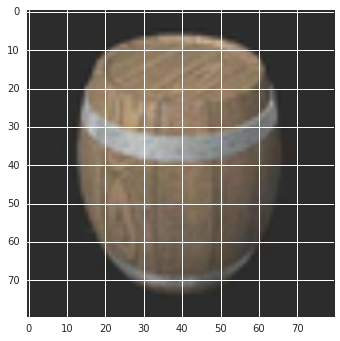